In [1]:
## Ref: https://www.youtube.com/watch?v=oXlwWbU8l2o

import cv2 as cv

import matplotlib.pyplot as plt
%matplotlib inline

### Masking

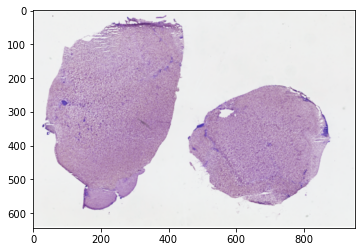

In [2]:
## read
a = cv.imread("image_test.png")

## display
#cv.imshow("window_name",a) ## will open an image window
#cv.waitKey(1000) ## 0 for infinite seconds
plt.imshow(a)

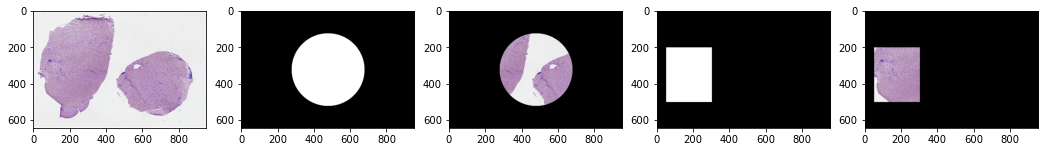

In [3]:
import numpy as np

blank = np.zeros(a.shape[:2], dtype='uint8')  ## mask must have the same size with image

mask1 = cv.circle(blank.copy(), (a.shape[1]//2, a.shape[0]//2), 200, 255, -1)
b1 = cv.bitwise_and(a, a, mask=mask1)

mask2 = cv.rectangle(blank.copy(), (50,200), (300,500), (255,0,0), -1)
b2 = cv.bitwise_and(a, a, mask=mask2)


fig, ax = plt.subplots(1,5,figsize=(18,8))
ax[0].imshow(a)

ax[1].imshow(mask1, cmap="gray")
ax[2].imshow(b1)

ax[3].imshow(mask2, cmap="gray")
ax[4].imshow(b2)

## Histogram

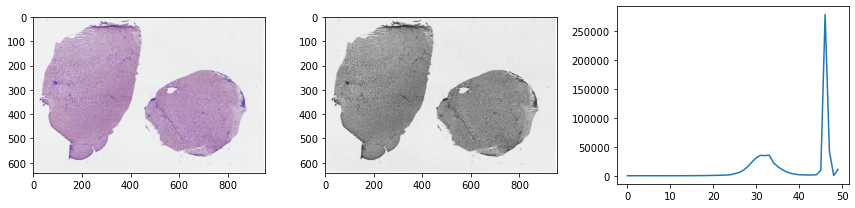

In [4]:
gray = cv.cvtColor(a, cv.COLOR_BGR2GRAY)

## calcHist(img, channels, mask, histSize, ranges) ## histSize = number of bins
gray_hist = cv.calcHist([gray], [0], None, [50], [0,256])

fig, ax = plt.subplots(1,3,figsize=(12,3))
ax[0].imshow(a)
ax[1].imshow(gray, cmap="gray")
ax[2].plot(gray_hist)
plt.tight_layout(h_pad=1, w_pad=1.5)

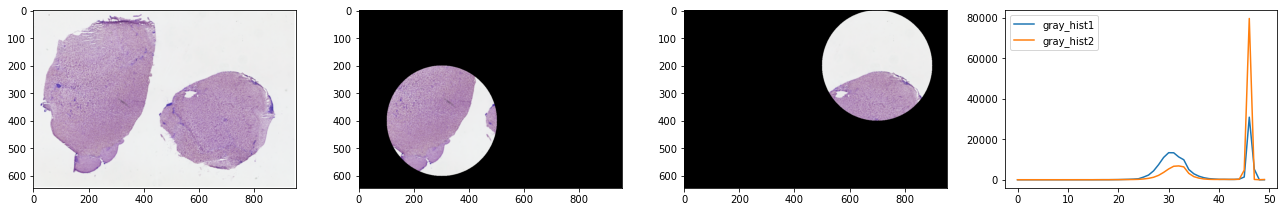

In [5]:
## calculate histogram within only a mask
a = cv.imread("image_test.png")

gray = cv.cvtColor(a, cv.COLOR_BGR2GRAY)

blank = np.zeros(a.shape[:2], dtype='uint8')  ## mask must have the same size with image

mask1 = cv.circle(blank.copy(), (300,400), 200, 255, -1)
b1 = cv.bitwise_and(a, a, mask=mask1)

mask2 = cv.circle(blank.copy(), (700,200), 200, 255, -1)
b2 = cv.bitwise_and(a, a, mask=mask2)

## calcHist(img, channels, mask, histSize, ranges) ## histSize = number of bins
gray_hist1 = cv.calcHist([gray], [0], mask1, [50], [0,256])
gray_hist2 = cv.calcHist([gray], [0], mask2, [50], [0,256])

fig, ax = plt.subplots(1,4,figsize=(18,3))
ax[0].imshow(a)
ax[1].imshow(b1)
ax[2].imshow(b2)
ax[3].plot(gray_hist1, label="gray_hist1")
ax[3].plot(gray_hist2, label="gray_hist2")
ax[3].legend()

plt.tight_layout(h_pad=1, w_pad=1.5)

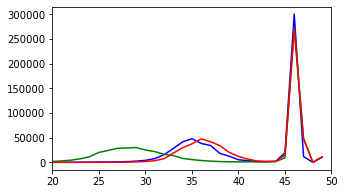

In [6]:
## Color histogram
a = cv.imread("image_test.png")

colors = ('b', 'g', 'r')
fig, ax = plt.subplots(1,1,figsize=(5,3))
for i,col in enumerate(colors):
    hist = cv.calcHist([a], [i], None, [50], [0,256])
    ax.plot(hist, color=col)
    ax.set_xlim([20,50])

### Thresholding

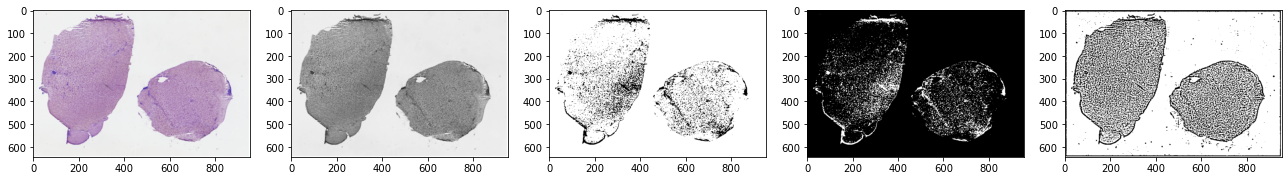

In [7]:
a = cv.imread("image_test.png")
gray = cv.cvtColor(a, cv.COLOR_BGR2GRAY)

## Simple thresholding
## cv.threshold(img, thresh, maxval, type)
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)

## thresh inverse
threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV)

## Adaptive thresholding
##cv.adaptiveThreshold(img, maxValue, adaptiveMethod, thresholdType, blockSize, C)
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 3)

fig, ax = plt.subplots(1,5,figsize=(18,8))
ax[0].imshow(a)
ax[1].imshow(gray, cmap="gray")
ax[2].imshow(thresh, cmap="gray")
ax[3].imshow(thresh_inv, cmap="gray")
ax[4].imshow(adaptive_thresh, cmap="gray")

plt.tight_layout(h_pad=1, w_pad=1.5)

### Gradients - edge detection

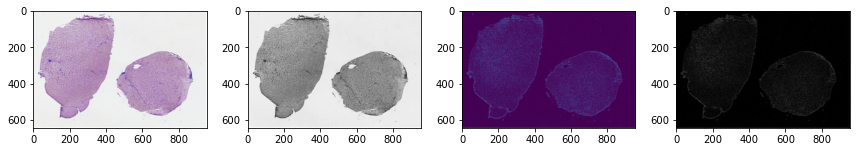

In [8]:
a = cv.imread("image_test.png")
gray = cv.cvtColor(a, cv.COLOR_BGR2GRAY)

## Laplacian
## cv.Laplacian(src, ddepth, dst=None,ksize=None, scale=None, delta=None)
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))

## Sobel
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)

fig, ax = plt.subplots(1,4,figsize=(12,8))
ax[0].imshow(a)
ax[1].imshow(gray, cmap="gray")
ax[2].imshow(lap)
ax[3].imshow(lap,cmap="gray")

plt.tight_layout(h_pad=1, w_pad=1.5)

/Users/u1094325/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:468: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


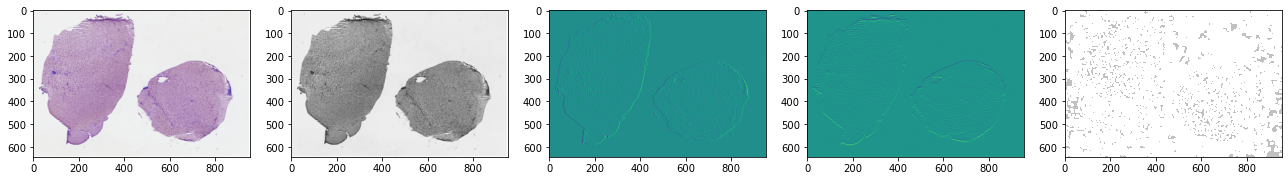

In [9]:
a = cv.imread("image_test.png")
gray = cv.cvtColor(a, cv.COLOR_BGR2GRAY)

## Sobel
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)

combined_sobel = cv.bitwise_or(sobelx, sobely)

fig, ax = plt.subplots(1,5,figsize=(18,8))
ax[0].imshow(a)
ax[1].imshow(gray, cmap="gray")
ax[2].imshow(sobelx)
ax[3].imshow(sobely)
ax[4].imshow(combined_sobel, cmap="gray")

plt.tight_layout(h_pad=1, w_pad=1.5)

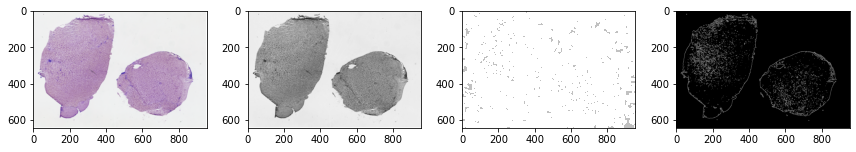

In [10]:
canny = cv.Canny(gray, 150, 175)

fig, ax = plt.subplots(1,4,figsize=(12,8))
ax[0].imshow(a)
ax[1].imshow(gray, cmap="gray")
ax[2].imshow(combined_sobel, cmap="gray")
ax[3].imshow(canny, cmap="gray")

plt.tight_layout(h_pad=1, w_pad=1.5)